In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
wnl=WordNetLemmatizer()
from textblob import TextBlob
import string


In [2]:
publications=pd.read_csv(r"C:\Users\prana\Downloads\Anuja\New\t8.shakespeare.txt",sep='\t',names=['Text'])

In [3]:
stopwords=pd.read_csv(r"C:\Users\prana\Downloads\Anuja\New\stopwords.txt",sep='\t',names=['Words'])

In [4]:
publications.shape

(114840, 1)

In [5]:
def data_preprocessing(text):
    text=re.sub('<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE WITH PERMISSION. ELECTRONIC AND MACHINE READABLE COPIES MAY BE DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED COMMERCIALLY. PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>', ' ', text)
    text_tokens=word_tokenize(text)
    fil_text=[w for w in text_tokens if not w in set(stopwords['Words'])]
    return " ".join(fil_text)

In [6]:
publications.shape

(114840, 1)

In [7]:
publications['Text']=publications['Text'].apply(data_preprocessing)

In [8]:
publications=publications.drop_duplicates('Text')

In [9]:
publications.shape

(110583, 1)

In [10]:
def lemmatize(data):
    text=[wnl.lemmatize(word)for word in data]
    return data

In [11]:
publications['Text']=publications['Text'].apply(lambda x:lemmatize(x))

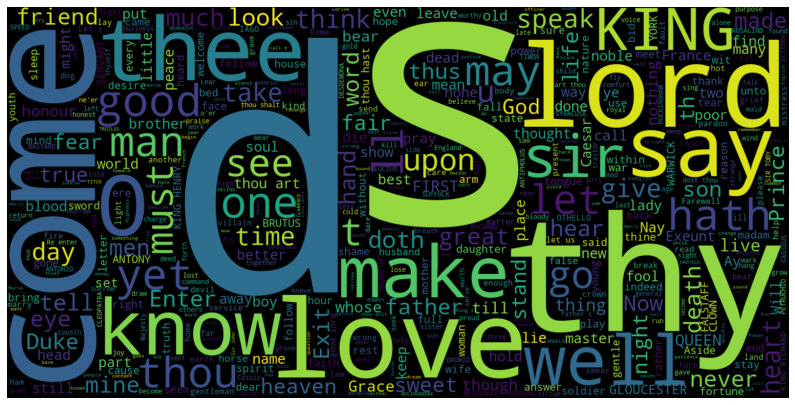

In [12]:
text= ' '.join([word for word in publications['Text']])
plt.figure(figsize=(14,12), facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
from nltk.tokenize import sent_tokenize
word_obj = {}
new_list =sent_tokenize(text)
for index,sentence in enumerate(new_list):
    word_count_per_sentence = len(sentence)
    word_obj[index] = word_count_per_sentence

In [14]:
Average_words_per_sentences = sum(word_obj.values())/len(word_obj)
Average_words_per_sentences

38.99265846454602

In [15]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [16]:
def sentiment(label):
    if label<0:
        return "Negative"
    elif label==0:
        return "Neutral"
    elif label>0:
        return "Positive"
    

In [17]:
publications['polarity']=publications['Text'].apply(polarity)

In [18]:
publications['sentiment']=publications['polarity'].apply(sentiment)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

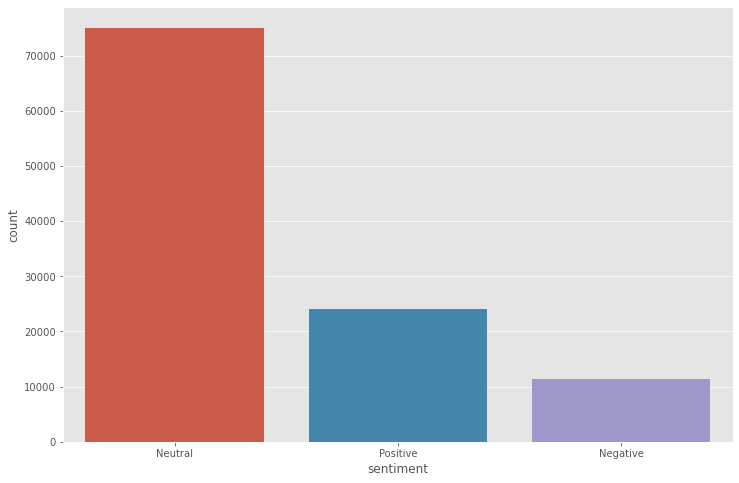

In [19]:
fig=plt.figure(figsize=(12,8))
sns.countplot(x='sentiment',data=publications)

# Per Type Of Publication

# 1) Comedy

In [20]:
publications_comedy=pd.read_csv(r"C:\Users\prana\Downloads\Anuja\New\comedy.txt",sep='\t',names=['Text'])
stopwords=pd.read_csv(r"C:\Users\prana\Downloads\Anuja\New\stopwords.txt",sep='\t',names=['Words'])

In [21]:
def data_preprocessing(text):
    text=re.sub('<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE WITH PERMISSION. ELECTRONIC AND MACHINE READABLE COPIES MAY BE DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED COMMERCIALLY. PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>', ' ', text)
    text_tokens=word_tokenize(text)
    fil_text=[w for w in text_tokens if not w in set(stopwords['Words'])]
    return " ".join(fil_text)

In [22]:
publications_comedy['Text']=publications_comedy['Text'].apply(data_preprocessing)
publications_comedy=publications_comedy.drop_duplicates('Text')

In [23]:
def lemmatize(data):
    text=[wnl.lemmatize(word)for word in data]
    return data

In [24]:
publications_comedy['Text']=publications_comedy['Text'].apply(lambda x:lemmatize(x))

In [25]:
text_comedy= ' '.join([word for word in publications_comedy['Text']])

In [26]:
from nltk.tokenize import sent_tokenize
word_obj = {}
new_list =sent_tokenize(text_comedy)
for index,sentence in enumerate(new_list):
    word_count_per_sentence = len(sentence)
    word_obj[index] = word_count_per_sentence

In [27]:
Average_words_per_sentences_comedy = sum(word_obj.values())/len(word_obj)
Average_words_per_sentences_comedy

36.63764164091377

In [28]:
publications_comedy['polarity']=publications_comedy['Text'].apply(polarity)

In [29]:
publications_comedy['sentiment']=publications_comedy['polarity'].apply(sentiment)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

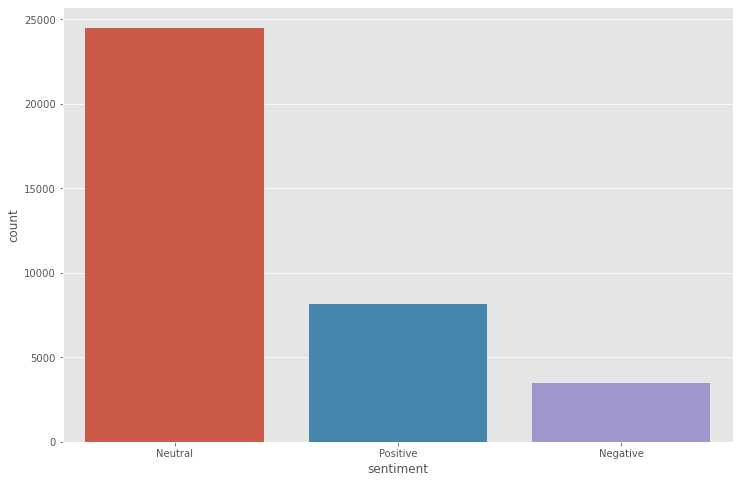

In [30]:
fig=plt.figure(figsize=(12,8))
sns.countplot(x='sentiment',data=publications_comedy)

# History

In [31]:
publications_history=pd.read_csv(r"C:\Users\prana\Downloads\Anuja\New\history.txt",sep='\t',names=['Text'])
stopwords=pd.read_csv(r"C:\Users\prana\Downloads\Anuja\New\stopwords.txt",sep='\t',names=['Words'])

In [32]:
def data_preprocessing(text):
    text=re.sub('<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE WITH PERMISSION. ELECTRONIC AND MACHINE READABLE COPIES MAY BE DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED COMMERCIALLY. PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>', ' ', text)
    text_tokens=word_tokenize(text)
    fil_text=[w for w in text_tokens if not w in set(stopwords['Words'])]
    return " ".join(fil_text)

In [33]:
publications_history['Text']=publications_history['Text'].apply(data_preprocessing)
publications_history=publications_history.drop_duplicates('Text')

In [34]:
def lemmatize(data):
    text=[wnl.lemmatize(word)for word in data]
    return data

In [35]:
publications_history['Text']=publications_history['Text'].apply(lambda x:lemmatize(x))

In [36]:
text_history= ' '.join([word for word in publications_history['Text']])

In [37]:
from nltk.tokenize import sent_tokenize
word_obj = {}
new_list =sent_tokenize(text_history)
for index,sentence in enumerate(new_list):
    word_count_per_sentence = len(sentence)
    word_obj[index] = word_count_per_sentence

In [38]:
Average_words_per_sentences_history = sum(word_obj.values())/len(word_obj)
Average_words_per_sentences_history

45.62193898871709

In [39]:
publications_history['polarity']=publications_history['Text'].apply(polarity)

In [40]:
publications_history['sentiment']=publications_history['polarity'].apply(sentiment)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

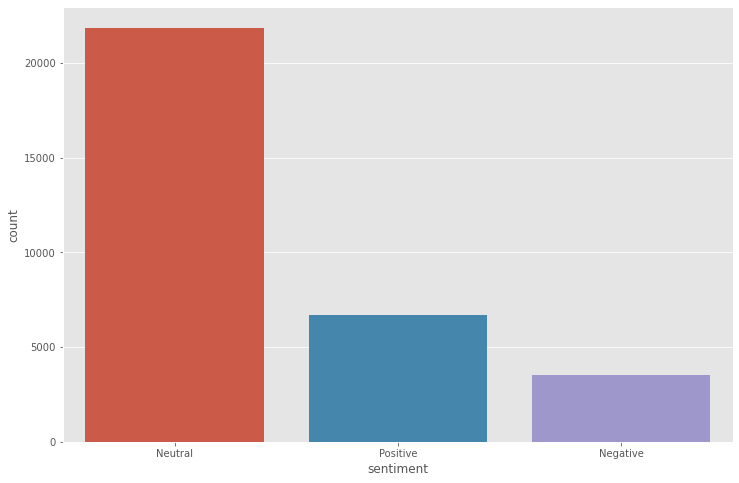

In [41]:
fig=plt.figure(figsize=(12,8))
sns.countplot(x='sentiment',data=publications_history)

# Sonnet

In [42]:
publications_sonnet=pd.read_csv(r"C:\Users\prana\Downloads\Anuja\New\THE SONNETS (1).txt",sep='\t',names=['Text'])
stopwords=pd.read_csv(r"C:\Users\prana\Downloads\Anuja\New\stopwords.txt",sep='\t',names=['Words'])

In [43]:
def data_preprocessing(text):
    text=re.sub('<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE WITH PERMISSION. ELECTRONIC AND MACHINE READABLE COPIES MAY BE DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED COMMERCIALLY. PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>', ' ', text)
    text_tokens=word_tokenize(text)
    fil_text=[w for w in text_tokens if not w in set(stopwords['Words'])]
    return " ".join(fil_text)

In [44]:
publications_sonnet['Text']=publications_sonnet['Text'].apply(data_preprocessing)
publications_sonnet=publications_sonnet.drop_duplicates('Text')

In [45]:
def lemmatize(data):
    text=[wnl.lemmatize(word)for word in data]
    return data

In [46]:
publications_sonnet['Text']=publications_sonnet['Text'].apply(lambda x:lemmatize(x))

In [47]:
text_sonnet= ' '.join([word for word in publications_sonnet['Text']])

In [48]:
from nltk.tokenize import sent_tokenize
word_obj = {}
new_list =sent_tokenize(text_sonnet)
for index,sentence in enumerate(new_list):
    word_count_per_sentence = len(sentence)
    word_obj[index] = word_count_per_sentence

In [49]:
Average_words_per_sentences_sonnet = sum(word_obj.values())/len(word_obj)
Average_words_per_sentences_sonnet

142.72156862745098

In [50]:
publications_sonnet['polarity']=publications_sonnet['Text'].apply(polarity)

In [51]:
publications_sonnet['sentiment']=publications_sonnet['polarity'].apply(sentiment)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

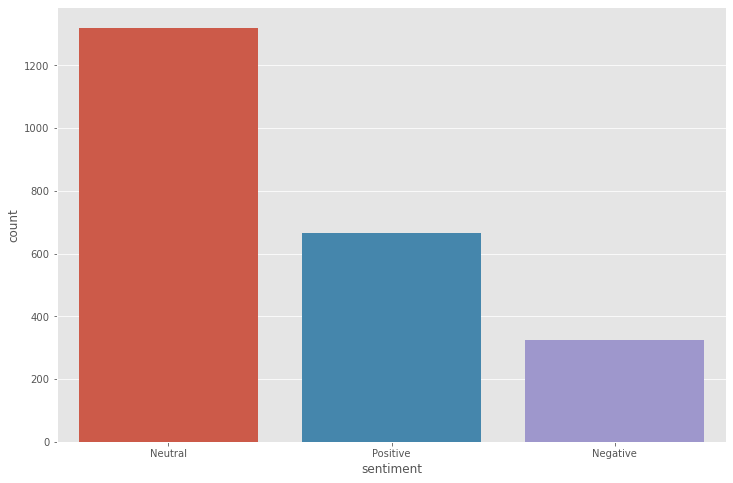

In [52]:
fig=plt.figure(figsize=(12,8))
sns.countplot(x='sentiment',data=publications_sonnet)

# Tragedy

In [53]:
publications_tragedy=pd.read_csv(r"C:\Users\prana\Downloads\Anuja\New\tragedy.txt",sep='\t',names=['Text'])
stopwords=pd.read_csv(r"C:\Users\prana\Downloads\Anuja\New\stopwords.txt",sep='\t',names=['Words'])

In [54]:
def data_preprocessing(text):
    text=re.sub('<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE WITH PERMISSION. ELECTRONIC AND MACHINE READABLE COPIES MAY BE DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED COMMERCIALLY. PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>', ' ', text)
    text_tokens=word_tokenize(text)
    fil_text=[w for w in text_tokens if not w in set(stopwords['Words'])]
    return " ".join(fil_text)

In [55]:
publications_tragedy['Text']=publications_tragedy['Text'].apply(data_preprocessing)
publications_tragedy=publications_tragedy.drop_duplicates('Text')

In [56]:
def lemmatize(data):
    text=[wnl.lemmatize(word)for word in data]
    return data

In [57]:
publications_tragedy['Text']=publications_tragedy['Text'].apply(lambda x:lemmatize(x))

In [58]:
text_tragedy= ' '.join([word for word in publications_tragedy['Text']])

In [59]:
from nltk.tokenize import sent_tokenize
word_obj = {}
new_list =sent_tokenize(text_tragedy)
for index,sentence in enumerate(new_list):
    word_count_per_sentence = len(sentence)
    word_obj[index] = word_count_per_sentence

In [60]:
Average_words_per_sentences_tragedy = sum(word_obj.values())/len(word_obj)
Average_words_per_sentences_tragedy

34.82309155120891

In [61]:
publications_tragedy['polarity']=publications_tragedy['Text'].apply(polarity)

In [62]:
publications_tragedy['sentiment']=publications_tragedy['polarity'].apply(sentiment)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

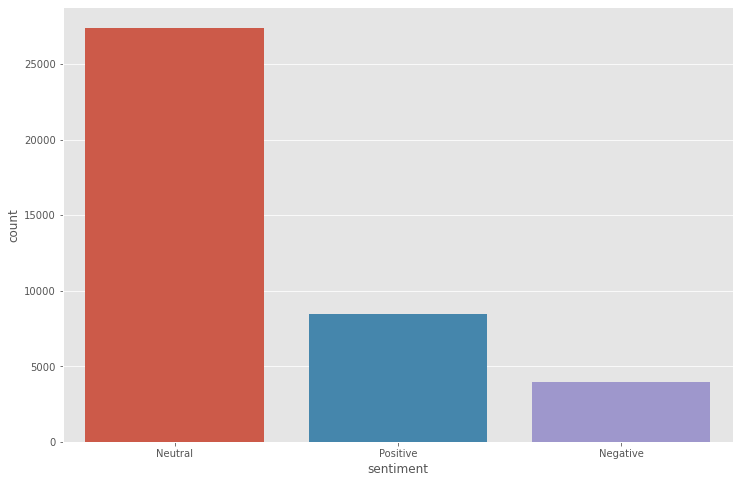

In [63]:
fig=plt.figure(figsize=(12,8))
sns.countplot(x='sentiment',data=publications_tragedy)

In [64]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords['Words']]

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(publications['Text'], publications['sentiment'], test_size=0.25)


In [68]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',RandomForestClassifier())])

In [69]:
## I selected RandomForestClassifier as my model, as the response variable is unbalanced, in such cases we can use 
## bagging technique to train our data

In [70]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021D603805E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [71]:
predictions = pipeline.predict(X_test)

In [72]:
## This can be used to predict sentiments of any sentence
pipeline.predict(['This is the 100th Etext file presented by Project Gutenberg, and'])

array(['Neutral'], dtype=object)

In [73]:
predictions

array(['Neutral', 'Neutral', 'Neutral', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

    Negative       0.91      0.97      0.93      2662
     Neutral       1.00      0.99      0.99     18938
    Positive       0.97      0.97      0.97      6046

    accuracy                           0.98     27646
   macro avg       0.96      0.97      0.97     27646
weighted avg       0.98      0.98      0.98     27646



In [75]:
from sklearn.naive_bayes import MultinomialNB
pipeline_nb = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB())])

In [76]:
pipeline_nb.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000021D603805E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [77]:
predictions_nb = pipeline_nb.predict(X_test)

In [78]:
print(classification_report(predictions_nb,y_test))

              precision    recall  f1-score   support

    Negative       0.18      0.98      0.30       511
     Neutral       1.00      0.82      0.90     22815
    Positive       0.65      0.91      0.76      4320

    accuracy                           0.84     27646
   macro avg       0.61      0.90      0.65     27646
weighted avg       0.93      0.84      0.87     27646

